In [4]:
import pandas as pd
elevation_angles = pd.read_csv("All_Sun_Angles.csv")
fall_equinox_angles = elevation_angles['Autumun Equinox']
summer_solstice_angles = elevation_angles['Summer Solstice']
winter_solstice_angles = elevation_angles['Winter Solstice']

In [ ]:
Every orbit accounts only for when solar panel is in contact with sun; determine power generation per orbit at various times 
of the year 

In [43]:
import math
import matplotlib.pyplot as plt
solar_irradiance = 1380
area = 0.003
efficiency = 0.24

def calculate_solar_power(angles):
    solar_power = 0
    for i in range(len(angles)):
        if(angles[i] < 0):
            angles[i] = angles[i] * (-1) #despite negative-angles, solar panels never lose energy, reflected in code
        
        #Apply cos(theta) = cos(90-theta) to convert elevation angle to incident angle, then multiply by pi/180 to convert to rads
        #Divide every power calculation by 60 to convert from milliwatts to milliwatt-hours
        solar_power += (solar_irradiance * area * efficiency * math.cos((90-angles[i])*math.pi/180) * 4 * 1000) / 60
    return solar_power

In [44]:
power_fall_equinox = calculate_solar_power(fall_equinox_angles)
print("Fall Equinox Power Generated: " + str(power_fall_equinox) + " mWh")
power_summer_solstice = calculate_solar_power(summer_solstice_angles)
print("Summer Solstice Power Generated: " + str(power_summer_solstice) + " mWh")
power_winter_solstice = calculate_solar_power(winter_solstice_angles)
print("Winter Solstice Power Generated: " + str(power_winter_solstice) + " mWh")

Fall Equinox Power Generated: 2403.131567564784 mWh
Summer Solstice Power Generated: 2715.8860423033325 mWh
Winter Solstice Power Generated: 1607.5082490230127 mWh


In [29]:
def plot_angles(data1, data2, data3, graph_title):
    iterator = []
    for i in range(len(data1)):
        iterator.append(i)
    plt.title(graph_title)   
    plt.xlabel("Time (Minutes)")
    plt.ylabel("Elevation Angle (Degrees)")
    plt.legend()
    fall_eq, = plt.plot(iterator, data1)
    summer_solstice, = plt.plot(iterator, data2)
    winter_solstice, = plt.plot(iterator, data3)
    legend = plt.legend((fall_eq, summer_solstice, winter_solstice), ('Fall Equinox', 'Summer Solstice', 'Winter Solstice'))

No handles with labels found to put in legend.


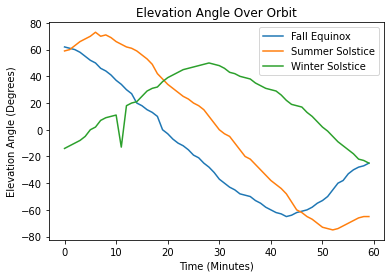

In [30]:
plot_angles(fall_equinox_angles, summer_solstice_angles, winter_solstice_angles, graph_title="Elevation Angle Over Orbit")

In [ ]:
Given power analysis per orbit for solar panels is done, now require analysis per orbit considering other components such as
magnetorquers, gyro, obc, transceiver. 

In [50]:
magnetorquer = -600
gyro = -12
obc = -800
power_used_platform_computing = (gyro + magnetorquer + obc) / 60 * 90 #all comp will use power for entire duration of 90-min orbit
print("OBC, ADCS per orbit: " + str(power_used_platform_computing))

OBC, ADCS per orbit: -2118.0


In [ ]:
Transceiver will transmit a certain time per each orbit, rest of time it will be receiving
Below analysis assumes single transmission per orbit, with following average time for transmission

In [45]:
transmission_data = pd.read_csv("Satellite-ISS_UNITY_25575-To-Facility-London_April22_Access.csv")
mean_transmit_time = transmission_data['Duration (sec)'].mean()/60/60
print('Average transmission time (mins): April - May 2022: ' + str(mean_transmit_time) + " hours") 

Average transmission time (mins): April - May 2022: 0.09202910202991453 hours


In [51]:
uhf_transceiver_transmit = 1140
uhf_transceiver_receive = 0.0825

power_used_transceiver = uhf_transceiver_transmit/60*mean_transmit_time*(-1) + uhf_transceiver_receive/60*(90-mean_transmit_time)*(-1)

In [53]:
def find_total_power(power_gen, obc_used, comms_used):
    remaining_power = power_gen + obc_used + comms_used
    return remaining_power

In [54]:
total_power_fall_equinox = find_total_power(power_fall_equinox, power_used_platform_computing, power_used_transceiver)
print("Fall Equinox Power Generated: " + str(total_power_fall_equinox) + " mWh")
total_power_summer_solstice = find_total_power(power_summer_solstice, power_used_platform_computing, power_used_transceiver)
print("Summer Solstice Power Generated: " + str(total_power_summer_solstice) + " mWh")
total_power_winter_solstice = find_total_power(power_winter_solstice, power_used_platform_computing, power_used_transceiver)
print("Winter Solstice Power Generated: " + str(total_power_winter_solstice) + " mWh")

Fall Equinox Power Generated: 283.2593911662307 mWh
Summer Solstice Power Generated: 596.0138659047794 mWh
Winter Solstice Power Generated: -512.3639273755404 mWh
